**IMPORTING DEPENDENCIES**

In [12]:
import pandas as pd
import numpy as np
import plotly.express as px
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
apps_df=pd.read_csv('/content/Play Store Data.csv')

**DATA CLEANING**

In [8]:
apps_df=apps_df.dropna(subset=["Rating"])
for column in  apps_df.columns:
   apps_df[column].fillna(apps_df[column].mode()[0],inplace=True)
apps_df.drop_duplicates(inplace=True)
apps_df = apps_df[apps_df['Rating'] <= 5]

<ipython-input-8-a0b5fb7d57ed>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps_df[column].fillna(apps_df[column].mode()[0],inplace=True)


In [9]:
apps_df.reset_index

<bound method DataFrame.reset_index of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10834     4.0       7                2.6M         500+  Free     0   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10834       Everyone                  Education     June 18, 2017   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10834               1.0.0          4.1 and up  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[8892 rows x 13 columns]>

In [10]:
#Convert the Installs column to numeric(int) by removing commas and +
apps_df['Installs'] = apps_df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
#converting Price column after removing $
apps_df['Price'] = apps_df['Price'].str.replace('$','').astype(float)
apps_df['Log_Installs']=np.log(apps_df['Installs'])
apps_df['Reviews']=apps_df['Reviews'].astype(int)
apps_df['Log_Reviews']=np.log(apps_df['Reviews'])
apps_df['Revenue']=apps_df['Price']*apps_df['Installs']
apps_df['Last Updated']=pd.to_datetime(apps_df['Last Updated'],errors='coerce')
apps_df['year']=apps_df['Last Updated'].dt.year

In [15]:
def rating_group(rating):
    if rating>=4:
        return('Top rated app')
    elif rating>=3:
        return('Above average')
    elif rating>=2:
        return('Average')
    else :
        return('Below Average')
apps_df['Rating_Group']=apps_df['Rating'].apply(rating_group)
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M',''))
    elif 'K' in size:
        return float(size.replace('K',''))/1024
    else:
         return np.nan
apps_df['Size']=apps_df['Size'].apply(convert_size)

In [32]:
reviews_df=pd.read_csv('/content/User Reviews.csv')

In [33]:
reviews_df.dropna(subset=['Translated_Review'],inplace=True)

In [36]:
merged_df=pd.merge(apps_df,reviews_df,on='App',how='inner')
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Log_Reviews,Rating_Group,Revenue,year,Country,Year-Month,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,"BestCam Selfie-selfie, beauty camera, photo ed...",BEAUTY,3.9,1739.0,None,500000.0,Free,0.0,Everyone,Beauty,...,7.461066,Above average,0.0,2018,Brazil,2018-07,This a̸p̸p̸ Na Kare please Mere Bhai A L pleas...,Negative,-0.500000,0.950000
1,"BestCam Selfie-selfie, beauty camera, photo ed...",BEAUTY,3.9,1739.0,None,500000.0,Free,0.0,Everyone,Beauty,...,7.461066,Above average,0.0,2018,Brazil,2018-07,Worst lot add; time west,Negative,-1.000000,1.000000
2,"BestCam Selfie-selfie, beauty camera, photo ed...",BEAUTY,3.9,1739.0,None,500000.0,Free,0.0,Everyone,Beauty,...,7.461066,Above average,0.0,2018,Brazil,2018-07,bed bakvas time west stupid,Negative,-0.800000,1.000000
3,"BestCam Selfie-selfie, beauty camera, photo ed...",BEAUTY,3.9,1739.0,None,500000.0,Free,0.0,Everyone,Beauty,...,7.461066,Above average,0.0,2018,Brazil,2018-07,It bad dont install worst,Negative,-0.850000,0.833333
4,"BestCam Selfie-selfie, beauty camera, photo ed...",BEAUTY,3.9,1739.0,None,500000.0,Free,0.0,Everyone,Beauty,...,7.461066,Above average,0.0,2018,Brazil,2018-07,Fake install best sweet selfie,Positive,0.283333,0.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34476,Fun Kid Racing - Motocross,FAMILY,4.1,59768.0,None,10000000.0,Free,0.0,Everyone,Racing;Action & Adventure,...,10.998226,Top rated app,0.0,2018,United States,2018-08,love good,Positive,0.600000,0.600000
34477,Fun Kid Racing - Motocross,FAMILY,4.1,59768.0,None,10000000.0,Free,0.0,Everyone,Racing;Action & Adventure,...,10.998226,Top rated app,0.0,2018,United States,2018-08,Great,Positive,0.800000,0.750000
34478,Fun Kid Racing - Motocross,FAMILY,4.1,59768.0,None,10000000.0,Free,0.0,Everyone,Racing;Action & Adventure,...,10.998226,Top rated app,0.0,2018,United States,2018-08,It's good,Positive,0.700000,0.600000
34479,Fun Kid Racing - Motocross,FAMILY,4.1,59768.0,None,10000000.0,Free,0.0,Everyone,Racing;Action & Adventure,...,10.998226,Top rated app,0.0,2018,United States,2018-08,I like motorcycle,Neutral,0.000000,0.000000


In [37]:
merged_df.to_csv('merged_df.csv',index=False)

**TASK-1=[Generate a word cloud for the most frequent keywords found in 5-star reviews, but exclude common stopwords and app names. Additionally, filter the reviews to include only those from apps in the "Health & Fitness" category.]**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


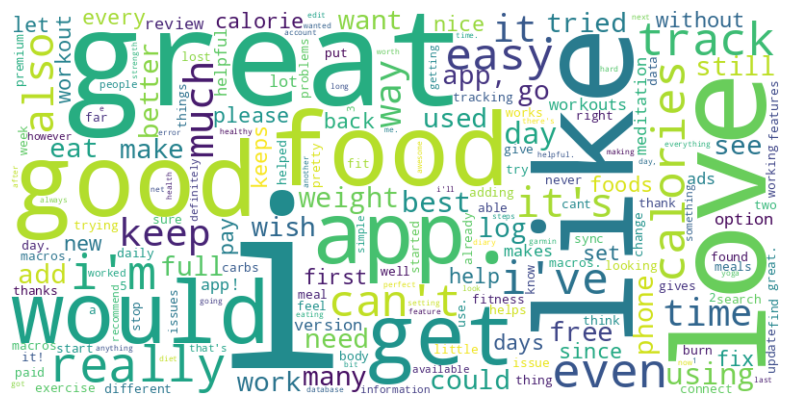

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# Ensure stopwords are downloaded
nltk.download('stopwords')
filtered_df = merged_df[(merged_df['Category'] == 'HEALTH_AND_FITNESS') & merged_df['Translated_Review'].notna()]

# Combine all reviews into a single text
all_reviews = " ".join(filtered_df['Translated_Review'].astype(str))

# Define a basic set of stopwords manually
custom_stopwords = set([
    "the", "and", "to", "of", "it", "in", "this", "is", "for", "on", "with", "that", "was",
    "as", "but", "if", "are", "at", "be", "by", "or", "so", "we", "you", "they", "an", "from",
    "can", "not", "had", "have", "my", "me", "your", "our", "its", "all", "more", "has", "been",
    "when", "will", "just", "about", "some", "do", "up", "no", "than", "out", "one", "very", "there"
]) | set(string.punctuation)

# Tokenize and clean text
tokens = [word.lower() for word in all_reviews.split() if word.lower() not in custom_stopwords]

# Remove app names
app_names = set(merged_df['App'].astype(str).str.lower().unique())
tokens = [word for word in tokens if word not in app_names]

# Generate word frequency
word_freq = Counter(tokens)

# Create and display word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**TASK-2=[Visualize the sentiment distribution (positive, neutral, negative) of user reviews using a stacked bar chart, segmented by rating groups (e.g., 1-2 stars, 3-4 stars, 4-5 stars). Include only apps with more than 1,000 reviews and group by the top 5 categories.]**

In [20]:
# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Filter apps with more than 1,000 reviews
filtered_apps = apps_df[apps_df['Reviews'].astype(int) > 1000].copy()

# Select top 5 categories based on count
top_5_categories = filtered_apps['Category'].value_counts().nlargest(5).index
filtered_apps = filtered_apps[filtered_apps['Category'].isin(top_5_categories)]

# Function to get sentiment
def get_sentiment(text):
    if pd.isna(text) or not isinstance(text, str):  # Handle missing/non-string values
        return "Neutral"
    score = sia.polarity_scores(text)["compound"]  # Get sentiment score
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to the 'Review' column
filtered_apps["Sentiment"] = filtered_apps["Reviews"].apply(get_sentiment)

# Create rating groups (1-2 stars, 3-4 stars, 4-5 stars)
filtered_apps["Rating Group"] = pd.cut(
    filtered_apps["Rating"],
    bins=[0, 2, 4,5 ],  # Rating bins: (0-2], (2-4], (4-5]
    labels=["1-2 Stars", "3-4 Stars", "4-5 Stars"]
)

# Aggregate sentiment distribution within each category & rating group
sentiment_distribution = (
    filtered_apps.groupby(["Category", "Rating Group", "Sentiment"])
    .size()
    .reset_index(name="Count")
)

# Create a stacked bar chart
fig = px.bar(
    sentiment_distribution,
    x="Rating Group",
    y="Count",
    color="Sentiment",
    facet_col="Category",
    title="Sentiment Distribution by Rating Group (Top 5 Categories)",
    labels={"Rating Group": "Rating Group", "Count": "Number of Reviews"},
    color_discrete_map={"Positive": "green", "Neutral": "gray", "Negative": "red"},
    width=900,
    height=500
)

# Dark mode layout adjustments
fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="black",
    font_color="white",
    title_font={"size": 16},
    xaxis=dict(title_font={"size": 12}),
    yaxis=dict(title_font={"size": 12}),
    margin=dict(l=10, r=10, t=50, b=10)
)

fig.show()


<ipython-input-20-814efa389b81>:35: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**TASK-3-[Create an interactive Choropleth map using Plotly to visualize global installs by Category. Apply filters to show data for only the top 5 app categories and highlight category where the number of installs exceeds 1 million. The app category should not start with the characters “A,” “C,” “G,” or “S.” This graph should work only between 6 PM IST and 8 PM IST; apart from that time, we should not show it in the dashboard itself.]**

In [21]:
import pandas as pd
import plotly.express as px
import datetime
import random

# Convert 'Installs' to numeric
apps_df['Installs'] = apps_df['Installs'].astype(str).str.replace(',', '', regex=True).str.replace(r'\+', '', regex=True).astype(float)

# Assign random countries if the dataset lacks country information
country_list = ["United States", "India", "United Kingdom", "Germany", "Canada", "France", "Brazil", "Australia"]
apps_df['Country'] = [random.choice(country_list) for _ in range(len(apps_df))]

# Filter out categories that start with "A", "C", "G", or "S"
apps_df = apps_df[~apps_df['Category'].str.startswith(('A', 'C', 'G', 'S'))]

# Select the top 5 categories based on the number of apps
top_5_categories = apps_df['Category'].value_counts().nlargest(5).index
filtered_apps = apps_df[apps_df['Category'].isin(top_5_categories)]

# Aggregate installs by country and category
category_installs = filtered_apps.groupby(['Category', 'Country'])['Installs'].sum().reset_index()

# Add a highlight column for categories where installs exceed 1 million
category_installs['Highlight'] = category_installs['Installs'].apply(lambda x: 'Highlighted' if x > 1_000_000 else 'Normal')

# Create a choropleth map
fig = px.choropleth(
    category_installs,
    locations='Country',
    locationmode='country names',
    color='Installs',
    hover_name='Category',
    title="Global Installs by App Category",
    color_continuous_scale='Blues',
    labels={'Installs': 'Total Installs'},
    width=900,
    height=500
)

# Get the current time in IST
current_time_ist = datetime.datetime.now(datetime.timezone.utc) + datetime.timedelta(hours=5, minutes=30)
start_time = current_time_ist.replace(hour=18, minute=0, second=0, microsecond=0)
end_time = current_time_ist.replace(hour=20, minute=0, second=0, microsecond=0)

# Ensure the graph is only shown between 6 PM - 8 PM IST
if start_time <= current_time_ist <= end_time:
    fig.show()
else:
    print("Graph is not available outside 6 PM - 8 PM IST")


Graph is not available outside 6 PM - 8 PM IST


**TASK-4=[Create a dual-axis chart comparing the average installs and revenue for free vs. paid apps within the top 3 app categories. Apply filters to exclude apps with fewer than 10,000 installs and revenue below $10,000 and android version should be more than 4.0 as well as size should be more than 15M and content rating should be Everyone and app name should not have more than 30 characters including space and special character .this graph should work only between 1 PM IST to 2 PM IST apart from that time we should not show this graph in dashboard itself.]**

In [27]:
import pandas as pd
import plotly.express as px
import datetime

# Convert 'Installs' and 'Price' to numeric
apps_df['Installs'] = apps_df['Installs'].astype(str).str.replace(',', '', regex=True).str.replace(r'\+', '', regex=True).astype(float)
apps_df['Price'] = apps_df['Price'].astype(str).replace(r'\$', '', regex=True).astype(float)

# Calculate revenue for paid apps
apps_df['Revenue'] = apps_df['Price'] * apps_df['Installs']

# Ensure 'Android Ver' is numeric (extract major version)
apps_df['Android Ver'] = apps_df['Android Ver'].astype(str).str.extract(r'(\d+\.\d+)').astype(float)

# Convert 'Size' to numeric (handling MB & KB values)
def convert_size(size):
    if isinstance(size, str):  # Ensure only strings are processed
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'K' in size:
            return float(size.replace('K', '')) / 1024  # Convert KB to MB
    return None  # Return None for missing values

apps_df['Size'] = apps_df['Size'].apply(convert_size)

# Filter data based on conditions
filtered_apps = apps_df[
    (apps_df['Installs'] >= 10000) &  # At least 10,000 installs
    (apps_df['Revenue'] >= 10000) &  # At least $10,000 revenue
    (apps_df['Android Ver'] > 4.0) &  # Android version > 4.0
    (apps_df['Size'] > 15) &  # Size > 15MB
    (apps_df['Content Rating'] == 'Everyone') &  # Only 'Everyone' rating
    (apps_df['App'].apply(lambda x: isinstance(x, str) and len(x) <= 30))  # App name ≤30 characters
]

# Select the top 3 categories based on the number of apps
top_3_categories = filtered_apps['Category'].value_counts().nlargest(3).index
filtered_apps = filtered_apps[filtered_apps['Category'].isin(top_3_categories)]

# Compute average installs & revenue for Free vs Paid apps
category_summary = (
    filtered_apps.groupby(['Category', 'Type'])[['Installs', 'Revenue']]
    .mean()
    .reset_index()
)

# Reshape data for Plotly Express
category_summary_melted = category_summary.melt(
    id_vars=['Category', 'Type'],
    value_vars=['Installs', 'Revenue'],
    var_name='Metric',
    value_name='Value'
)

# Create a grouped bar chart for Installs and Revenue
fig = px.bar(
    category_summary_melted,
    x="Category",
    y="Value",
    color="Metric",
    barmode="group",
    facet_col="Type",
    title="Comparison of Average Installs & Revenue (Free vs Paid)",
    labels={"Category": "App Category", "Value": "Average Value", "Metric": "Measure"},
    color_discrete_map={"Installs": "blue", "Revenue": "red"},
    width=900,
    height=500
)

# Get the current time in IST
current_time_ist = datetime.datetime.now(datetime.timezone.utc) + datetime.timedelta(hours=5, minutes=30)
start_time = current_time_ist.replace(hour=13, minute=0, second=0, microsecond=0)
end_time = current_time_ist.replace(hour=14, minute=0, second=0, microsecond=0)

# Ensure the graph is only shown between 1 PM - 2 PM IST
if start_time <= current_time_ist <= end_time:
    fig.show()
else:
    print("Graph is not available outside 1 PM - 2 PM IST")

fig.show()

<ipython-input-27-c8bdbd3703f6>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c8bdbd3703f6>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c8bdbd3703f6>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c8bdbd

Graph is not available outside 1 PM - 2 PM IST


In [31]:
import pandas as pd
import plotly.express as px

#  Filter only paid apps
paid_apps = apps_df[apps_df['Type'] == 'Paid'].copy()

paid_apps['Revenue'] = paid_apps['Price'] * paid_apps['Installs']

#  Create scatter plot with trendline
fig = px.scatter(
    paid_apps,
    x='Installs',
    y='Revenue',
    color='Category',  # Color-code by category
    title='Revenue vs Installs for Paid Apps',
    labels={'Installs': 'Number of Installs', 'Revenue': 'Revenue ($)'},
    trendline="ols",
    log_x=True,  # Log scale to spread out low values
    log_y=True,
    width=800,
    height=500
)

#  Improve layout for readability
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)

fig.show()


**TASK-5=[ Use a grouped bar chart to compare the average rating and total review count for the top 10 app categories by number of installs. Filter out any categories where the average rating is below 4.0 and size below 10 M and last update should be Jan month . this graph should work only between 3PM IST to 5 PM IST apart from that time we should not show this graph in dashboard itself.]**

In [22]:
import pandas as pd
import plotly.express as px
import datetime

# Convert 'Installs' and 'Reviews' to numeric
apps_df['Installs'] = apps_df['Installs'].astype(str).str.replace(',', '', regex=True).str.replace(r'\+', '', regex=True).astype(float)
apps_df['Reviews'] = apps_df['Reviews'].astype(str).str.replace(',', '', regex=True).astype(float)

# Ensure 'Rating' is numeric
apps_df['Rating'] = pd.to_numeric(apps_df['Rating'], errors='coerce')

# Convert 'Size' to numeric (handling MB & KB values)
def convert_size(size):
    if isinstance(size, str):  # Ensure only strings are processed
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'K' in size:
            return float(size.replace('K', '')) / 1024  # Convert KB to MB
    return None  # Return None for missing values

apps_df['Size'] = apps_df['Size'].apply(convert_size)

# Convert 'Last Updated' to datetime format
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'], errors='coerce')

# Filter data based on conditions
filtered_apps = apps_df[
    (apps_df['Rating'] >= 4.0) &  # Rating must be 4.0 or above
    (apps_df['Size'] >= 10) &  # Size must be at least 10 MB
    (apps_df['Last Updated'].dt.month == 1)  # Must be updated in January
]

# Select the top 10 categories based on total installs
top_10_categories = filtered_apps.groupby('Category')['Installs'].sum().nlargest(10).index
filtered_apps = filtered_apps[filtered_apps['Category'].isin(top_10_categories)]

# Compute average rating & total reviews per category
category_summary = (
    filtered_apps.groupby('Category')
    .agg({'Rating': 'mean', 'Reviews': 'sum'})
    .reset_index()
)

# Reshape data for Plotly Express
category_summary_melted = category_summary.melt(
    id_vars=['Category'],
    value_vars=['Rating', 'Reviews'],
    var_name='Metric',
    value_name='Value'
)

# Create a grouped bar chart
fig = px.bar(
    category_summary_melted,
    x="Category",
    y="Value",
    color="Metric",
    barmode="group",
    title="Comparison of Average Rating & Total Reviews (Top 10 Categories)",
    labels={"Category": "App Category", "Value": "Value", "Metric": "Measure"},
    color_discrete_map={"Rating": "blue", "Reviews": "red"},
    width=900,
    height=500
)

# Get the current time in IST
current_time_ist = datetime.datetime.now(datetime.timezone.utc) + datetime.timedelta(hours=5, minutes=30)
start_time = current_time_ist.replace(hour=15, minute=0, second=0, microsecond=0)
end_time = current_time_ist.replace(hour=17, minute=0, second=0, microsecond=0)

# Ensure the graph is only shown between 3 PM - 5 PM IST
if start_time <= current_time_ist <= end_time:
    fig.show()
else:
    print("Graph is not available outside 3 PM - 5 PM IST")


Graph is not available outside 3 PM - 5 PM IST


<ipython-input-22-3f18d776eaca>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-3f18d776eaca>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-3f18d776eaca>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-3f18d7

**TASK-6=[Generate a heatmap to show the correlation matrix between installs, ratings, and review counts. Filter the data to include only apps that have been updated within the last year and have at least 100,000 installs and reviews count should be more than 1k and genres name should not be Starting with characters A , F , E , G , I , K . this graph should work only between 2 PM IST to 4 PM IST apart from that time we should not show this graph in dashboard itself.]**

In [24]:
import pandas as pd
import plotly.express as px
import datetime

# Convert 'Installs' and 'Reviews' to numeric
apps_df['Installs'] = apps_df['Installs'].astype(str).str.replace(',', '', regex=True).str.replace(r'\+', '', regex=True).astype(float)
apps_df['Reviews'] = apps_df['Reviews'].astype(str).str.replace(',', '', regex=True).astype(float)

# Ensure 'Rating' is numeric
apps_df['Rating'] = pd.to_numeric(apps_df['Rating'], errors='coerce')

# Convert 'Last Updated' to datetime
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'], errors='coerce')

# Define one year ago from today
one_year_ago = pd.Timestamp.today() - pd.DateOffset(years=1)

# Filter data based on conditions
filtered_apps = apps_df[
    (apps_df['Last Updated'] >= one_year_ago) &  # Updated within the last year
    (apps_df['Installs'] >= 100_000) &  # At least 100,000 installs
    (apps_df['Reviews'] > 1_000) &  # More than 1,000 reviews
    (~apps_df['Genres'].str.startswith(('A', 'F', 'E', 'G', 'I', 'K'), na=False))  # Exclude genres with these starting letters
]

# Compute correlation matrix
correlation_matrix = filtered_apps[['Installs', 'Rating', 'Reviews']].corr()

# Convert correlation matrix to long format
correlation_long = correlation_matrix.stack().reset_index()
correlation_long.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Create heatmap
fig = px.imshow(
    correlation_matrix,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    color_continuous_scale='RdBu_r',
    title="Correlation Heatmap (Installs, Ratings, Reviews)",
    width=700,
    height=500
)

# Get the current time in IST
current_time_ist = datetime.datetime.now(datetime.timezone.utc) + datetime.timedelta(hours=5, minutes=30)
start_time = current_time_ist.replace(hour=14, minute=0, second=0, microsecond=0)
end_time = current_time_ist.replace(hour=16, minute=0, second=0, microsecond=0)

# Ensure the graph is only shown between 2 PM - 4 PM IST
if start_time <= current_time_ist <= end_time:
    fig.show()
else:
    print("Graph is not available outside 2 PM - 4 PM IST")


Graph is not available outside 2 PM - 4 PM IST


<ipython-input-24-f743d9a0c050>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-f743d9a0c050>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-f743d9a0c050>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-f743d9

**TASK-7=[Plot a bubble chart to analyze the relationship between app size (in MB) and average rating, with the bubble size representing the number of installs. Include a filter to show only apps with a rating higher than 3.5 and that belong to the "Games" category and installs should be more than 50k as well as this graph should work only between 5 PM IST to 7 PM IST apart from that time we should not show this graph in dashboard itself.]**

In [25]:
import pandas as pd
import plotly.express as px
import datetime

# Convert 'Installs' to numeric
apps_df['Installs'] = apps_df['Installs'].astype(str).str.replace(',', '', regex=True).str.replace(r'\+', '', regex=True).astype(float)

# Ensure 'Rating' is numeric
apps_df['Rating'] = pd.to_numeric(apps_df['Rating'], errors='coerce')

# Convert 'Size' to numeric (handling MB & KB values)
def convert_size(size):
    if isinstance(size, str):  # Ensure only strings are processed
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'K' in size:
            return float(size.replace('K', '')) / 1024  # Convert KB to MB
    return None  # Return None for missing values

apps_df['Size'] = apps_df['Size'].apply(convert_size)

# Filter data based on conditions
filtered_apps = apps_df[
    (apps_df['Rating'] > 3.5) &  # Rating must be greater than 3.5
    (apps_df['Category'] == 'Games') &  # Category must be "Games"
    (apps_df['Installs'] > 50_000)  # More than 50,000 installs
]

# Create a bubble chart
fig = px.scatter(
    filtered_apps,
    x='Size',
    y='Rating',
    size='Installs',
    color='Installs',
    title="App Size vs. Average Rating (Bubble Size = Installs)",
    labels={'Size': 'App Size (MB)', 'Rating': 'Average Rating', 'Installs': 'Number of Installs'},
    color_continuous_scale='Viridis',
    width=900,
    height=500
)

# Get the current time in IST
current_time_ist = datetime.datetime.now(datetime.timezone.utc) + datetime.timedelta(hours=5, minutes=30)
start_time = current_time_ist.replace(hour=17, minute=0, second=0, microsecond=0)
end_time = current_time_ist.replace(hour=19, minute=0, second=0, microsecond=0)

# Ensure the graph is only shown between 5 PM - 7 PM IST
if start_time <= current_time_ist <= end_time:
    fig.show()
else:
    print("Graph is not available outside 5 PM - 7 PM IST")


<ipython-input-25-ad8fe5a45255>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-ad8fe5a45255>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-ad8fe5a45255>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Graph is not available outside 5 PM - 7 PM IST


**TASK-8=[Create a violin plot to visualize the distribution of ratings for each app category, but only include categories with more than 50 apps and app name should contain letter “C” and exclude apps with fewer than 10 reviews and rating should be less 4.0. this graph should work only between 4 PM IST to 6 PM IST apart from that time we should not show this graph in dashboard itself.]**

In [26]:
import pandas as pd
import plotly.express as px
import datetime

# Convert 'Reviews' to numeric
apps_df['Reviews'] = apps_df['Reviews'].astype(str).str.replace(',', '', regex=True).astype(float)

# Ensure 'Rating' is numeric
apps_df['Rating'] = pd.to_numeric(apps_df['Rating'], errors='coerce')

# Filter data based on conditions
filtered_apps = apps_df[
    (apps_df['Rating'] < 4.0) &  # Rating must be below 4.0
    (apps_df['Reviews'] >= 10) &  # Must have at least 10 reviews
    (apps_df['App'].str.contains('C', case=False, na=False))  # App name contains 'C'
]

# Select categories with more than 50 apps
category_counts = filtered_apps['Category'].value_counts()
valid_categories = category_counts[category_counts > 50].index
filtered_apps = filtered_apps[filtered_apps['Category'].isin(valid_categories)]

# Create violin plot
fig = px.violin(
    filtered_apps,
    x='Category',
    y='Rating',
    box=True,  # Show box plot inside violin
    points='all',  # Show all points
    title="Distribution of Ratings by App Category",
    labels={'Category': 'App Category', 'Rating': 'Rating'},
    width=900,
    height=500
)

# Get the current time in IST
current_time_ist = datetime.datetime.now(datetime.timezone.utc) + datetime.timedelta(hours=5, minutes=30)
start_time = current_time_ist.replace(hour=16, minute=0, second=0, microsecond=0)
end_time = current_time_ist.replace(hour=18, minute=0, second=0, microsecond=0)

# Ensure the graph is only shown between 4 PM - 6 PM IST
if start_time <= current_time_ist <= end_time:
    fig.show()
else:
    print("Graph is not available outside 4 PM - 6 PM IST")


Graph is not available outside 4 PM - 6 PM IST


<ipython-input-26-1d4c5d86e86e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-1d4c5d86e86e>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**TASK-9=[Plot a time series line chart to show the trend of total installs over time, segmented by app category. Highlight periods of significant growth by shading the areas under the curve where the increase in installs exceeds 20% month-over-month and content rating should be teen and app name should start with letter ‘E’ and installs should be more than 10k as well as this graph should work only between 6 PM IST to 9 PM IST apart from that time we should not show this graph in dashboard itself.]**

In [23]:
import pandas as pd
import plotly.express as px
import datetime

# Convert 'Installs' to numeric
apps_df['Installs'] = apps_df['Installs'].astype(str).str.replace(',', '', regex=True).str.replace(r'\+', '', regex=True).astype(float)

# Convert 'Last Updated' to datetime
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'], errors='coerce')

# Extract Year-Month for aggregation
apps_df['Year-Month'] = apps_df['Last Updated'].dt.to_period('M')

# Filter based on conditions
filtered_apps = apps_df[
    (apps_df['Content Rating'] == 'Teen') &  # Only Teen-rated apps
    (apps_df['App'].str.startswith('E', na=False)) &  # App name starts with 'E'
    (apps_df['Installs'] > 10_000)  # More than 10k installs
]

# Group by category & month to calculate total installs
install_trends = (
    filtered_apps.groupby(['Category', 'Year-Month'])
    .agg({'Installs': 'sum'})
    .reset_index()
)

# Convert 'Year-Month' to datetime format for plotting
install_trends['Year-Month'] = install_trends['Year-Month'].astype(str)
install_trends['Year-Month'] = pd.to_datetime(install_trends['Year-Month'])

# Compute month-over-month growth
install_trends['MoM Growth'] = install_trends.groupby('Category')['Installs'].pct_change() * 100

# Create a time series line chart
fig = px.line(
    install_trends,
    x='Year-Month',
    y='Installs',
    color='Category',
    title="Trend of Total Installs Over Time (Segmented by Category)",
    labels={'Year-Month': 'Time (Year-Month)', 'Installs': 'Total Installs'},
    width=900,
    height=500
)

# Highlight areas where month-over-month growth > 20%
highlighted_areas = install_trends[install_trends['MoM Growth'] > 20]

fig.add_trace(
    px.area(
        highlighted_areas,
        x='Year-Month',
        y='Installs',
        color='Category'
    ).data[0]
)

# Get the current time in IST
current_time_ist = datetime.datetime.now(datetime.timezone.utc) + datetime.timedelta(hours=5, minutes=30)
start_time = current_time_ist.replace(hour=18, minute=0, second=0, microsecond=0)
end_time = current_time_ist.replace(hour=21, minute=0, second=0, microsecond=0)

# Ensure the graph is only shown between 6 PM - 9 PM IST
if start_time <= current_time_ist <= end_time:
    fig.show()
else:
    print("Graph is not available outside 6 PM - 9 PM IST")


Graph is not available outside 6 PM - 9 PM IST


<ipython-input-23-a3d847e9c63c>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-a3d847e9c63c>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-a3d847e9c63c>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

